# Energy Consumption Time Series Forecasting

## Objective
The objective of this task is to forecast short-term household energy consumption
using historical time series data.


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet


In [38]:
import pandas as pd

df = pd.read_csv(
    "household_power_consumption.txt",
    sep=';',
    nrows=200000,   # limit rows to avoid freezing
    parse_dates={'datetime': ['Date', 'Time']},
    infer_datetime_format=True,
    na_values='?',
    low_memory=False
)

df.head()


C:\Users\User\AppData\Local\Temp\ipykernel_26312\232437912.py:3: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(
C:\Users\User\AppData\Local\Temp\ipykernel_26312\232437912.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(
C:\Users\User\AppData\Local\Temp\ipykernel_26312\232437912.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(


,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [39]:
df = df[['datetime', 'Global_active_power']]
df.dropna(inplace=True)

df.head()


,datetime,Global_active_power
0,2006-12-16 17:24:00,4.216
1,2006-12-16 17:25:00,5.360
2,2006-12-16 17:26:00,5.374
3,2006-12-16 17:27:00,5.388
4,2006-12-16 17:28:00,3.666


In [41]:
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')

In [42]:
daily = df.resample('D').mean().reset_index()
daily.head()

,datetime,Global_active_power
0,2006-12-16,3.053475
1,2006-12-17,2.354486
2,2006-12-18,1.530435
3,2006-12-19,1.157079
4,2006-12-20,1.545658


In [43]:
prophet_df = daily.rename(columns={
    'datetime': 'ds',
    'Global_active_power': 'y'
})
prophet_df.head()


,ds,y
0,2006-12-16,3.053475
1,2006-12-17,2.354486
2,2006-12-18,1.530435
3,2006-12-19,1.157079
4,2006-12-20,1.545658


In [44]:
model = Prophet()
model.fit(prophet_df)


14:09:46 - cmdstanpy - INFO - Chain [1] start processing
14:09:46 - cmdstanpy - INFO - Chain [1] done processing


In [45]:
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)



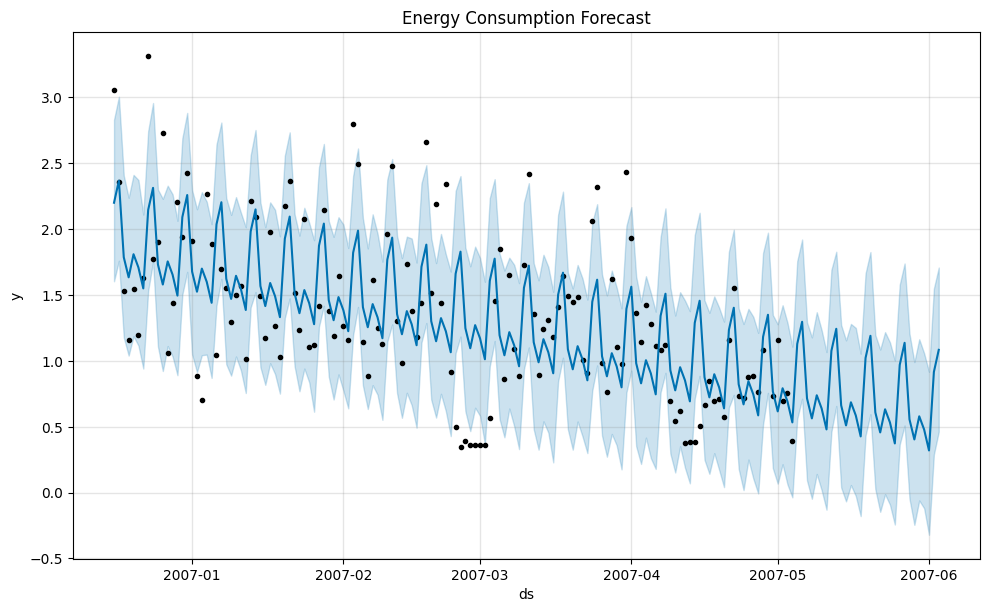

In [46]:
import matplotlib.pyplot as plt

model.plot(forecast)
plt.title ("Energy Consumption Forecast")
plt.show()


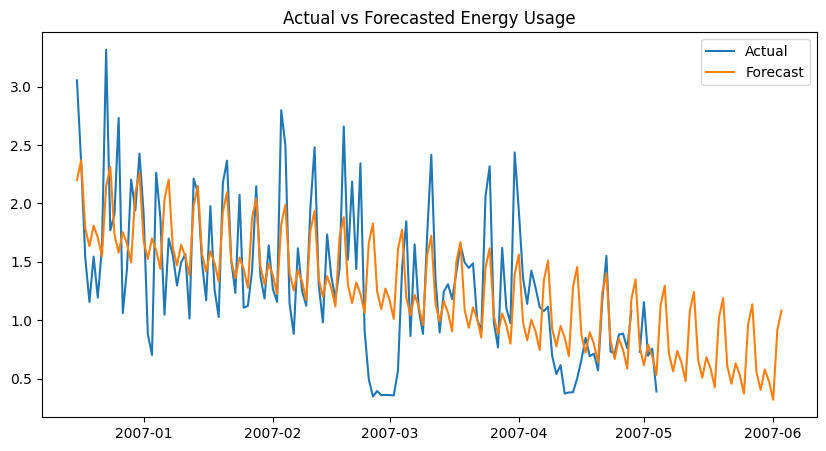

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(prophet_df['ds'], prophet_df['y'], label='Actual')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast')
plt.legend()
plt.title("Actual vs Forecasted Energy Usage")
plt.show()


## Conclusion
The Prophet model successfully forecasted household energy consumption by
capturing trend and seasonality patterns in the historical data.
The results can assist in short-term energy planning and analysis.

